In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  math as m
from linearRegression import *


#Normal Fit

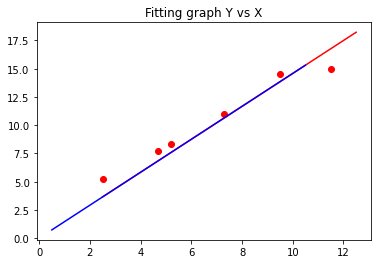

In [41]:
X_train = np.matrix([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
X_train = np.transpose(X_train)
Y_train = np.matrix([5.21, 7.70, 8.30, 11, 14.5, 15])
Y_train = np.transpose(Y_train)
theta1 = fitGD(X_train, Y_train, 0.01, 0.01, 1, 1000)
theta2=fitNormal(X_train, Y_train)
plt.title("Fitting graph Y vs X")
plt.scatter(np.ravel(X_train),np.ravel(Y_train),color="red")
y = np.arange(start=2.5,stop=13.5,step=1)
x = float(theta1)
x = x*y 
y1 = np.arange(start=0.5,stop=11.5,step=1)
x1 = float(theta2)
x1 = x1*y1
plt.plot(y,x,color="red")
# plt.show()
plt.plot(y1,x1,color="blue")
plt.show()

#normally weighted

In [17]:
X_train = np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
Y_train = np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
X_test = np.array([3.5, 5, 6, 8, 10 ])
tau = np.array([0.1, 1, 10, 100])
for i in (tau) :
    Y_pred = np.array([])
    for j in (X_test):
        Y_pred=np.append(Y_pred,locallyWeighted(X_train,Y_train,j,i,100))
    print("for tau =",i,"Y_predicted=",Y_pred)

for tau = 0.1 Y_predicted= [ 6.34182784  8.06        9.53138374 12.03536563 15.25479452]
for tau = 1.0 Y_predicted= [ 6.34619683  8.06977833  9.33866055 12.11740229 14.56612345]
for tau = 10.0 Y_predicted= [ 6.42333936  8.19731867  9.37520439 11.71859651 14.0440817 ]
for tau = 100.0 Y_predicted= [ 6.45081998  8.20258191  9.37036766 11.70580578 14.04106589]


## Error handling

#For different Lamdas

In [3]:

X_test = np.array([3.5, 5, 6, 8, 10 ])
Y_test = np.array([6.25, 8.2, 9.5, 12.1, 14.7])
X_train=np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
Y_train=np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
yt = np.mat(Y_train)
yte = np.mat(Y_test)

m = len(X_train)
J_train =np.array([])
J_test =np.array([])
la = np.array([])
for l in range(15):
    theta1 = fitGD(np.transpose(np.mat(X_train)),np.transpose(np.mat(Y_train)),0.01,l, 1,10000) 
    Y_pred_test = float(theta1)*X_test
    Y_pred_train=float(theta1)*X_train
    ypm = np.mat(Y_pred_train)
    ypme = np.mat(Y_pred_test)
    J_train = np.append(J_train,float(np.matmul((yt-ypm),np.transpose(yt-ypm)))/(2*m))
    J_test = np.append(J_test,float(np.matmul((yte-ypme),np.transpose(yte-ypme)))/(2*m))
    la = np.append(la,l)


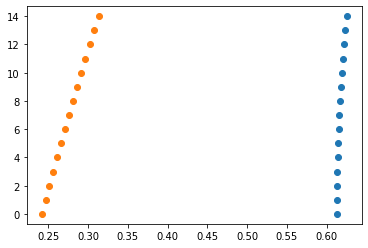

In [4]:
plt.title("Graph of J_test/J_train vs Lamda")
plt.scatter(J_train,la)
plt.scatter(J_test,la)
plt.show()


#Error in locally weighted

In [35]:
X_train = np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5])
Y_train = np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
X_test = np.array([3.5, 5, 6, 8, 10 ])
Y_test = np.array([6.25, 8.2, 9.5, 12.1, 14.7])
yt = np.mat(Y_train)
yte = np.mat(Y_test)
m = len(X_train)
J_train =np.array([])
J_test =np.array([])
tau = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
for i in (tau) :
    Y_pred_test = np.array([])
    for j in (X_test):
        Y_pred_test=np.append(Y_pred_test,locallyWeighted(X_train,Y_train,j,i,100))
    ypme = np.mat(Y_pred_test)
    J_test = np.append(J_test,float(np.matmul((yte-ypme),np.transpose(yte-ypme)))/(2*m))
for i in (tau) :
    Y_pred_train = np.array([])
    for j in (X_train):
        Y_pred_train=np.append(Y_pred_train,locallyWeighted(X_train,Y_train,j,i,100))
    ypm = np.mat(Y_pred_train)
    J_train = np.append(J_train,float(np.matmul((yt-ypm),np.transpose(yt-ypm)))/(2*m))
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

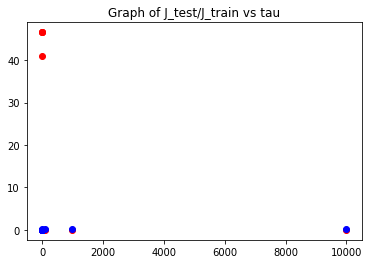

In [40]:
plt.title("Graph of J_test/J_train vs tau")
plt.scatter(tau,J_test,color="red")
plt.scatter(tau,J_train,color="blue")
plt.show

array([4.65877083e+01, 4.65877083e+01, 4.65877083e+01, 4.09879750e+01,
       2.84159878e-02, 5.87230861e-03, 5.17770918e-02, 5.38935930e-02,
       5.39164413e-02, 5.39166700e-02])

array([7.16548656e-30, 7.16548656e-30, 7.16548656e-30, 7.16548656e-30,
       2.30451873e-17, 5.64849779e-03, 1.43536754e-01, 1.47888139e-01,
       1.47933111e-01, 1.47933561e-01])